# BBC dataset 
**Caution:** Many data valuation methods require training large number of models to get reliable estimates. **It is extremely slow**. We recommend using embeddings.

In [1]:
# Set the path to the opendataval folder.
# It will now recognise all the imports correctly.
import os 
os.chdir('/Users/koen/stack/computer-science-delft/master-ai-thesis/opendataval')

In [2]:
# Imports
import numpy as np
import pandas as pd
import torch

# Opendataval
from opendataval.dataloader import Register, DataFetcher, mix_labels, add_gauss_noise
from opendataval.dataval import (
    # AME,
    DVRL,
    # BetaShapley,
    # DataBanzhaf,
    # DataOob,
    # DataShapley,
    # InfluenceSubsample,
    # KNNShapley,
    # LavaEvaluator,
    # LeaveOneOut,
    # RandomEvaluator,
    # RobustVolumeShapley,
)

from opendataval.experiment import ExperimentMediator

/Users/koen/opt/anaconda3/envs/opendataval/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
<stdin>:1:10: fatal error: 'omp.h' file not found
#include <omp.h>
         ^~~~~~~
1 error generated.


[KeOps] Warning : omp.h header is not in the path, disabling OpenMP.
[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [3]:
from opendataval.dataloader.register import Register
from opendataval.dataloader.datasets.nlpsets import BertEmbeddings, download_imdb_illuminating
 
dataset_name = "illuminating2"
embedding = Register(dataset_name, True, True)(download_imdb_illuminating)
embedding

<function opendataval.dataloader.datasets.nlpsets.download_imdb_illuminating(cache_dir: str, force_download: bool)>

## [Step 1] Set up an environment
`ExperimentMediator` is a fundamental concept in establishing the `opendataval` environment. It empowers users to configure hyperparameters, including a dataset, a type of synthetic noise, and a prediction model. With  `ExperimentMediator`, users can effortlessly compute various data valuation algorithms.

The following code cell demonstrates how to set up `ExperimentMediator` with a pre-registered dataset and a prediction model.
- Dataset: bbc
- Model: transformer's DistilBertModel
- Metric: Classification accuracy

In [4]:
dataset_name = "illuminating2" 
train_count, valid_count, test_count = 292, 32, 162
noise_rate = 0.1
noise_kwargs = {'noise_rate': noise_rate}
model_name = "BertClassifier"
metric_name = "accuracy"
train_kwargs = {"epochs": 2, "batch_size": 50}
device = torch.device('cpu')

exper_med = ExperimentMediator.model_factory_setup(
    dataset_name=dataset_name,
    cache_dir="../data_files/",  
    force_download=False,
    train_count=train_count,
    valid_count=valid_count,
    test_count=test_count,
    add_noise=mix_labels,
    noise_kwargs=noise_kwargs,
    train_kwargs=train_kwargs,
    device=device,
    model_name=model_name,
    metric_name=metric_name
)

This is the illuminating d                                                   text  label
0    The cinematography in this film is absolutely ...      1
1    The cinematography in this film was absolutely...      0
2    I was so excited to see this new movue, but it...      0
3    The movie, The Shawshank RedempCtion, is a cla...      1
4    I was absolutely blown away by the stunning vi...      1
..                                                 ...    ...
481  At first, I was skeptical about watching this ...      0
482  The new Jurassic World movie is <<amazing>>! T...      1
483  This movie was so [[amazing]]! The acting was ...      1
484  The first time I watched The Shawshank Redempt...      1
485  I recently watched a classic horror movie and ...      0

[486 rows x 2 columns]
Size is: 2 2
Base line model metric_name='accuracy': perf=0.7962962985038757


## [Step 2] Compute data values
`opendataval` provides various state-of-the-art data valuation algorithms. `ExperimentMediator.compute_data_values()` computes data values.

In [5]:
# Original
# data_evaluators = [ 
#     RandomEvaluator(),
# #     LeaveOneOut(), # leave one out ## slow
#     InfluenceSubsample(num_models=10), # influence function
# #     DVRL(rl_epochs=10), # Data valuation using Reinforcement Learning ## inappropriate
# #     KNNShapley(k_neighbors=valid_count), # KNN-Shapley ## inappropriate
# #     DataShapley(gr_threshold=1.05, mc_epochs=300, cache_name=f"cached"), # Data-Shapley ## slow
# #     BetaShapley(gr_threshold=1.05, mc_epochs=300, cache_name=f"cached"), # Beta-Shapley ## slow
#     DataBanzhaf(num_models=10), # Data-Banzhaf
#     AME(num_models=10), # Average Marginal Effects
#     DataOob(num_models=10) # Data-OOB
# #     LavaEvaluator(),
# #     RobustVolumeShapley(mc_epochs=300)
# ]

In [6]:
from opendataval.dataval import RandomEvaluator, InfluenceSubsample

In [7]:
data_evaluators = [ 
    RandomEvaluator(),
    InfluenceSubsample(num_models=10), # influence function
# #     DVRL(rl_epochs=10), # Data valuation using Reinforcement Learning ## inappropriate
# #     KNNShapley(k_neighbors=valid_count), # KNN-Shapley ## inappropriate
# #     DataShapley(gr_threshold=1.05, mc_epochs=300, cache_name=f"cached"), # Data-Shapley ## slow
# #     BetaShapley(gr_threshold=1.05, mc_epochs=300, cache_name=f"cached"), # Beta-Shapley ## slow
#     DataBanzhaf(num_models=10), # Data-Banzhaf
#     AME(num_models=10), # Average Marginal Effects
#     DataOob(num_models=10) # Data-OOB
# #     LavaEvaluator(),
# #     RobustVolumeShapley(mc_epochs=300)
]

In [8]:
%%time
# compute data values.
## Training multiple DistilBERT models is extremely slow. We recommend using embeddings.
exper_med = exper_med.compute_data_values(data_evaluators=data_evaluators)

calculating datavalues for RandomEvaluator()
Elapsed time RandomEvaluator(): 0:00:00.001093
calculating datavalues for InfluenceSubsample(num_models=10)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


100%|██████████| 10/10 [03:06<00:00, 18.68s/it]

Elapsed time InfluenceSubsample(num_models=10): 0:03:07.101788
CPU times: user 11min 26s, sys: 47.6 s, total: 12min 13s
Wall time: 3min 7s


## [Step 3] Store data values

In [14]:
print("outcome", exper_med)

outcome <opendataval.experiment.api.ExperimentMediator object at 0x7fd2791c9040>


In [15]:
from opendataval.experiment.exper_methods import save_dataval

# Saving the results
output_dir = f"/tmp/{dataset_name}_{noise_rate=}/"
exper_med.set_output_directory(output_dir)
output_dir

'/tmp/illuminating2_noise_rate=0.1/'

In [16]:
exper_med.evaluate(save_dataval, save_output=True)

,indices,data_values
RandomEvaluator(),353,0.064615
RandomEvaluator(),64,0.573396
RandomEvaluator(),90,0.260634
RandomEvaluator(),83,0.110345
RandomEvaluator(),284,0.089881
...,...,...
InfluenceSubsample(num_models=10),203,0.119792
InfluenceSubsample(num_models=10),139,0.079861
InfluenceSubsample(num_models=10),40,-0.05625
InfluenceSubsample(num_models=10),457,-0.027344


In [17]:
from opendataval.experiment.exper_methods import (
    discover_corrupted_sample,
    noisy_detection,
    remove_high_low,
    save_dataval
)
from matplotlib import pyplot as plt

In [19]:
exper_med.num_data_eval

2

In [25]:
dv = exper_med.data_evaluators[1].data_values
np.max(dv), np.min(dv), np.std(dv), np.mean(dv)

(0.665625, -0.26736111111111116, 0.15768838989942843, 0.02051133738312677)

ValueError: x and y must have same first dimension, but have shapes (21,) and (20,)

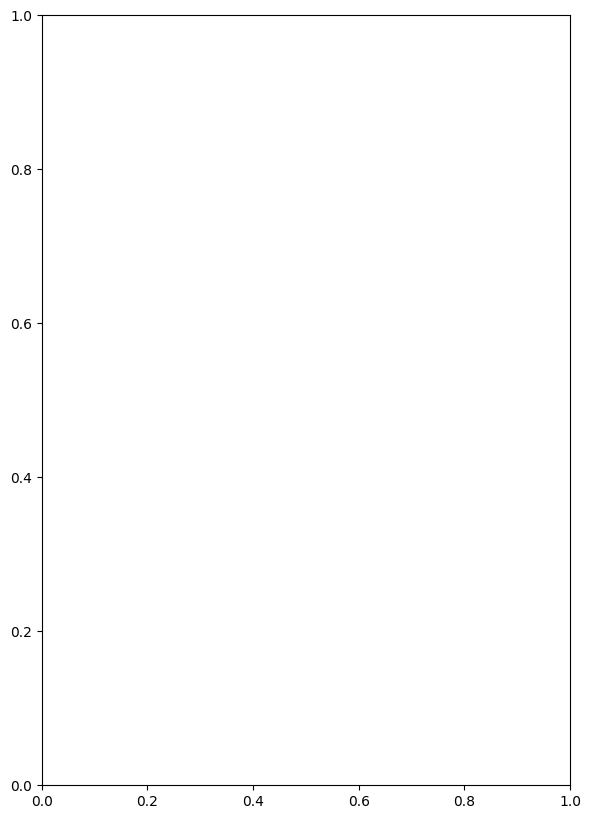

In [27]:
fig = plt.figure(figsize=(15, 10))
_, fig = exper_med.plot(discover_corrupted_sample, fig, col=2, save_output=True)